In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches

DataPath='./Data/Data_F6_Stoch_PILOCm'
DataPath_rate='./Data/Data_F6_Rate_PILOCm'

%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading function for Seizure Rate calculation

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath):
    os.makedirs(DataPath)
if not os.path.isfile(DataPath+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F6_Stoch_PILOCm.ipynb
if not os.path.isdir(DataPath_rate):
    os.makedirs(DataPath_rate)
if not os.path.isfile(DataPath_rate+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F6_Rate_PILOCm.ipynb

  0%|          | 0/30 [00:00<?, ?it/s]

Data not found. Running Data Generation script


100%|██████████| 30/30 [00:34<00:00,  1.14s/it]


Data not found. Running Data Generation script


In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

# viridis = cm.get_cmap('viridis', 12)
# color_scheme_3examples = [viridis(0.05)[0:3],viridis(0.5)[0:3],viridis(0.9)[0:3]]
# # alpha_value=0.45
size_scaler = 2.5
alp=0.1 # alpha value for transparent lines N=30

h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

## Figure 6a  

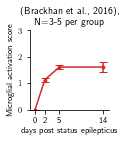

In [4]:
##### Plotting left panel with animal model data #####
data = load_animal_model_data('Brackhan_et_al_2016')
        
days_vect = data['days_vect']
        
fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)
        
plt.bar(days_vect, data['microglial_act_mean_vect'],color='white',
       yerr=data['microglial_act_sem_vect'],
       align='center',
       alpha=1,
       ecolor='tab:red',
       capsize=10/size_scaler)
plt.plot(days_vect, data['microglial_act_mean_vect'],'.',color='tab:red',markersize=14/size_scaler)
plt.plot(days_vect, data['microglial_act_mean_vect'],color='tab:red')

plt.xticks(days_vect, days_vect)
plt.ylim([0,3])
plt.xlabel('days post status epilepticus')
plt.ylabel('Microglial activation score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt. title ('(Brackhan et al., 2016),\n N=3-5 per group')
 
plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('Figures/Fig6/Fig_6a1.pdf')

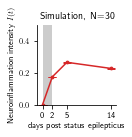

In [5]:
##### Plotting right panel with simulation data #####
N=30
days_vect = data['days_vect']

I_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): 
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    
    I_array[ii]=I_vec[np.array((np.array(days_vect)/dt),'i')]
    
I_mean_vect=np.mean(I_array,axis=0)
I_std_vect=np.std(I_array,axis=0)
I_sem_vect=I_std_vect/np.sqrt(N)

# plotting #
listt=np.load(DataPath+'/Sim_'+str(1)+'.npy',allow_pickle=True)
rect = patches.Rectangle((0,-1),listt[0]['IBDR_E_duration'][1],2,linewidth=1,edgecolor='none',facecolor='k',alpha=0.2)

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1) 

plt.bar(days_vect, I_mean_vect,color='white',
       yerr=I_sem_vect,
       align='center',
       alpha=1,
       ecolor='tab:red',
       capsize=10/size_scaler)
plt.plot(days_vect, I_mean_vect,'.',color='tab:red',markersize=14/size_scaler)
plt.plot(days_vect, I_mean_vect,color='tab:red')
    
plt.ylim([0,0.5])
plt.xticks(days_vect, days_vect)

ax.add_patch(rect)

plt.xlabel('days post status epilepticus')
plt.ylabel(r'Neuroinflammation intensity $I(t)$')
plt. title (r'Simulation, N=30')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w)
fig.savefig('Figures/Fig6/Fig_6a2.pdf')

## Figure 6b  

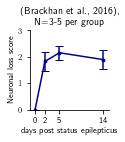

In [6]:
##### Plotting left panel with animal model data #####
data = load_animal_model_data('Brackhan_et_al_2016')

days_vect = data['days_vect']

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(w,w)

plt.bar(days_vect, data['NeurLoss_mean_vect'],color='white',
       yerr=data['NeurLoss_sem_vect'],
       align='center',
       alpha=1,
       ecolor='darkblue',
       capsize=10/size_scaler)
plt.plot(days_vect, data['NeurLoss_mean_vect'],'.',color='darkblue',markersize=14/size_scaler)
plt.plot(days_vect, data['NeurLoss_mean_vect'],color='darkblue')
plt.xticks(days_vect, days_vect)
plt.ylim([0,3])
plt.xlabel('days post status epilepticus')
plt.ylabel('Neuronal loss score')

plt. title ('(Brackhan et al., 2016),\n N=3-5 per group')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w)
fig.savefig('Figures/Fig6/Fig_6b1.pdf')

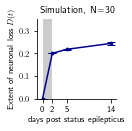

In [7]:
##### Plotting right panel with simulation data #####
N=30

days_vect = data['days_vect']
D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N):
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)

# plotting #
listt=np.load(DataPath+'/Sim_'+str(1)+'.npy',allow_pickle=True)
rect = patches.Rectangle((0,-1),listt[0]['IBDR_E_duration'][1],2,linewidth=1,edgecolor='none',facecolor='k',alpha=0.2)

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)    

plt.bar(days_vect, D_mean_vect,color='white',
       yerr=D_sem_vect,
       align='center',
       alpha=1,
       ecolor='darkblue',
       capsize=10/size_scaler)
plt.plot(days_vect, D_mean_vect,'.',color='darkblue',markersize=14/size_scaler)
plt.plot(days_vect, D_mean_vect,color='darkblue')
    
plt.ylim([0,0.35])
plt.xticks(days_vect, days_vect)

ax.add_patch(rect)

plt.xlabel('days post status epilepticus')
plt.ylabel(r'Extent of neuronal loss $D(t)$')
plt. title (r'Simulation, N=30')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('Figures/Fig6/Fig_6b2.pdf')

## Figure 6c

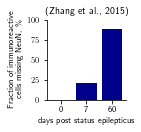

In [8]:
##### Plotting left panel with animal model data #####
data = load_animal_model_data('Zhang_et_al_2015')

days_vect = data['days_vect']

Neur_loss_mean_vect=(data['NeuN_immunoreact_mean_vect'][0]-data['NeuN_immunoreact_mean_vect'])/data['NeuN_immunoreact_mean_vect'][0]*100 # calculating fraction of neurons missing relative to control measure

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1) 

plt.bar(np.arange(0,len(days_vect)), Neur_loss_mean_vect,color='darkblue',
       align='center',
       alpha=1,
       ecolor='darkblue',
       capsize=10/3*2)
plt.xticks(np.arange(0,len(days_vect)), days_vect)
plt.ylim([0,100])
plt.xlabel('days post status epilepticus')
plt.ylabel('Fraction of immunoreactive \n cells missing NeuN, \%')

plt. title ('(Zhang et al., 2015)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('Figures/Fig6/Fig_6c1.pdf')

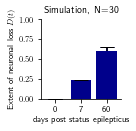

In [9]:
##### Plotting right panel with simulation data #####
N=30

days_vect = data['days_vect']
D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): 
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()
    
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)

# plotting #
fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1) 

plt.bar(np.arange(0,len(days_vect)), D_mean_vect,color='darkblue',
       yerr=D_sem_vect,
       align='center',
       alpha=1,
       ecolor='darkblue',
       capsize=10/3*2)
err1, cl, _ = ax.errorbar(np.arange(0,len(days_vect)), D_mean_vect, yerr=D_sem_vect, lolims=True, capsize = 10/3*2, ls='None', color='k')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap
    
plt.ylim([0,1])
plt.xticks(np.arange(0,len(days_vect)), days_vect)
 
plt.xlabel('days post status epilepticus')
plt.ylabel(r'Extent of neuronal loss $D(t)$')
plt. title (r'Simulation, N=30')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w)
fig.savefig('Figures/Fig6/Fig_6c2.pdf')

## Figure 6d

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


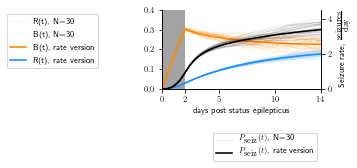

In [10]:
N=30
day_0=0
day_end=14

listt=np.load(DataPath+'/Sim_'+str(1)+'.npy',allow_pickle=True)  
lambda_max=listt[0]['lambda_max']
params=listt[0]
rect = patches.Rectangle((0,-1),listt[0]['IBDR_E_duration'][1],2,linewidth=1,edgecolor='none',facecolor='k',alpha=0.2)


fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)    

ax.add_patch(rect)

for ii in range(0,N):
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    B_vec=listt[1]['B_vec'].copy()
    lambda_vec=listt[1]['lambda_vec'].copy()
    
    if ii == 0:    
        plt.plot(t_vec,R_vec,color='dodgerblue',alpha=alp,label='R(t), N=30',linewidth=2.0/size_scaler)
        plt.plot(t_vec,B_vec,color='darkorange',alpha=alp,label='B(t), N=30',linewidth=2.0/size_scaler)
    else:
        plt.plot(t_vec,R_vec,color='dodgerblue',alpha=alp,linewidth=2.0/size_scaler)
        plt.plot(t_vec,B_vec,color='darkorange',alpha=alp,linewidth=2.0/size_scaler)


listt=np.load(DataPath_rate+'/Sim_'+str(1)+'.npy',allow_pickle=True) 
dt=listt[0]['dt']
t_vec=listt[1]['t_vec'].copy()
R_vec=listt[1]['R_vec'].copy()
B_vec=listt[1]['B_vec'].copy()
plt.plot(t_vec,B_vec,'darkorange',label='B(t), rate version',linewidth=4.0/size_scaler) 
plt.plot(t_vec,R_vec,'dodgerblue',label='R(t), rate version',linewidth=4.0/size_scaler) 
        

ax2 = ax.twinx()
for ii in range(0,N):
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True) 
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    lambda_vec=listt[1]['lambda_vec'].copy()
    if ii==0:
        plt.plot(t_vec,SeizureRate(I_vec,R_vec, params),color='black',alpha=alp,label=r'$P_{\textnormal{seiz}}(t)$, N=30',linewidth=2.0/size_scaler)
    else:
        plt.plot(t_vec,SeizureRate(I_vec,R_vec, params),color='black',alpha=alp, linewidth=2.0/size_scaler)

listt=np.load(DataPath_rate+'/Sim_'+str(1)+'.npy',allow_pickle=True) 
listt[0]['lambda_max']=lambda_max
dt=listt[0]['dt']
t_vec=listt[1]['t_vec'].copy()
I_vec=listt[1]['I_vec'].copy()
R_vec=listt[1]['R_vec'].copy()        
plt.plot(t_vec,SeizureRate(I_vec,R_vec, params),'black',linewidth=4.0/size_scaler,label=r'$P_{\textnormal{seiz}}(t)$, rate version')


ax2.legend(bbox_to_anchor=(1,-0.5))
ax.legend(bbox_to_anchor=(-1, 1), loc='upper left')

ax.add_patch(rect)

plt.xlim([0,day_end])
plt.xticks(np.array([0,2,5,10,14]))

ax.set_ylim([0,0.4])
ax2.set_ylim([0,4.5])
ax2.set_ylabel(r'Seizure rate, $\frac{\textnormal{seizures}}{\textnormal{day}}$')
ax.set_xlabel('days post status epilepticus')

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
plt.gcf().subplots_adjust(right=1-margin/2)
set_size(2*w,w) 
fig.savefig('Figures/Fig6/Fig_6d.pdf')

## Figure 6e

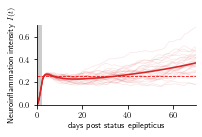

In [11]:
N=30
day_0=0
day_end=70

listt=np.load(DataPath+'/Sim_'+str(1)+'.npy',allow_pickle=True)  
lambda_max=listt[0]['lambda_max']
params=listt[0]
rect = patches.Rectangle((0,-1),listt[0]['IBDR_E_duration'][1],2,linewidth=1,edgecolor='none',facecolor='k',alpha=0.2)


fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)    

ax.add_patch(rect)
plt.plot([0,day_end],[params['Theta'],params['Theta']],'r--',linewidth=2.0/size_scaler)

for ii in range(0,N):
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()    
    plt.plot(t_vec,I_vec,color='tab:red',alpha=alp,linewidth=2.0/size_scaler)


listt=np.load(DataPath_rate+'/Sim_'+str(1)+'.npy',allow_pickle=True) 
dt=listt[0]['dt']
t_vec=listt[1]['t_vec'].copy()
I_vec=listt[1]['I_vec'].copy()

plt.plot(t_vec,I_vec,color='tab:red',linewidth=4.0/size_scaler)      

plt.xlim([0,day_end])
# ylim=ax.get_ylim()
plt.ylim([0,0.7])
plt.ylabel(r'Neuroinflammation intensity $I(t)$')
plt.xlabel('days post status epilepticus')
# plt. title (r'Simulation, Raw $I(t)$, N=30')
# plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(2*w,w)
fig.savefig('Figures/Fig6/Fig_6e.pdf')

## Figure 6f

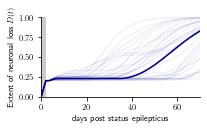

In [12]:
N=30
day_0=0
day_end=70

listt=np.load(DataPath+'/Sim_'+str(1)+'.npy',allow_pickle=True)  
lambda_max=listt[0]['lambda_max']
params=listt[0]
rect = patches.Rectangle((0,-1),listt[0]['IBDR_E_duration'][1],2,linewidth=1,edgecolor='none',facecolor='k',alpha=0.2)


fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)    

ax.add_patch(rect)

for ii in range(0,N):
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()    
    plt.plot(t_vec,D_vec,'darkblue',alpha=alp,linewidth=2.0/size_scaler)


listt=np.load(DataPath_rate+'/Sim_'+str(1)+'.npy',allow_pickle=True) 
dt=listt[0]['dt']
t_vec=listt[1]['t_vec'].copy()
D_vec=listt[1]['D_vec'].copy()

plt.plot(t_vec,D_vec,'darkblue',linewidth=4.0/size_scaler)      

plt.xlim([0,day_end])
plt.ylim([0,1.0])
plt.ylabel(r'Extent of neuronal loss $D(t)$')
plt.xlabel('days post status epilepticus')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

 
plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(2*w,w)
fig.savefig('Figures/Fig6/Fig_6f.pdf')